The aim here is to predict rating for apps. In the first part, we are trying to train our model to predict rating for the apps which are paid apps and calculate the error rate for our trained model.
In the second part, we are trying to predict rating for the apps with our trained model for apps which are free initially and then are made paid. So, we are checking whether it's popularity remains the same.

Input dataset : https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore.csv

# Training model with the paid apps data

In [1]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#Reading file for ios apps from AppleStore dataset

Path = r'C:\Users\Dhwani\Desktop\AppoMania\googleplaystore.csv'
googleStoreDf = pd.read_csv(Path,parse_dates=True)
googleStoreDf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
googleStoreDf.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [4]:
googleStoreDf = googleStoreDf.dropna()

In [5]:
googleStoreDf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
# Taking features which are required for rating prediction into a temporary dataset

lmDf = googleStoreDf[['Rating','Reviews','Category','Installs','Price','Content Rating']].copy()

In [7]:
lmDf.dtypes

Rating            float64
Reviews             int64
Category           object
Installs           object
Price              object
Content Rating     object
dtype: object

In [8]:
lmDf.head()

,Rating,Reviews,Category,Installs,Price,Content Rating
0,4.1,159,ART_AND_DESIGN,"10,000+",0,Everyone
1,3.9,967,ART_AND_DESIGN,"500,000+",0,Everyone
2,4.7,87510,ART_AND_DESIGN,"5,000,000+",0,Everyone
3,4.5,215644,ART_AND_DESIGN,"50,000,000+",0,Teen
4,4.3,967,ART_AND_DESIGN,"100,000+",0,Everyone


In [9]:
# Taking data where Price > 0 and rating > 0
from sklearn.preprocessing import LabelEncoder

lmDf['Installs'] = lmDf['Installs'].astype('object').str.replace('+', '')
lmDf['Installs'] = lmDf['Installs'].astype('object').str.replace(',', '')
lmDf['Price'] = lmDf['Price'].astype('object').str.replace('$', '')
lmDf['Installs'] = pd.to_numeric(lmDf['Installs'])
lmDf['Price'] = pd.to_numeric(lmDf['Price'])
lmDf = lmDf[(lmDf.Price != 0)]

obj = LabelEncoder()
lmDf['Category'] = obj.fit_transform(lmDf['Category'].astype('object'))
lmDf['Content Rating'] = obj.fit_transform(lmDf['Content Rating'].astype('object'))
#lmDf.head()

lmDf.dtypes

Rating            float64
Reviews             int64
Category            int64
Installs            int64
Price             float64
Content Rating      int64
dtype: object

In [10]:
y = lmDf[['Rating']].copy()
X = lmDf.drop('Rating',axis=1)

In [11]:
#Spliting dataset into train and test data

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
Predict_rating_train = lm.predict(X_train)
Predict_rating_test = lm.predict(X_test)

In [13]:
ratingErrorTest = round(np.mean(np.subtract(Y_test.values,Predict_rating_test) ** 2),3)
print(ratingErrorTest)

0.265


In [14]:
ratingErrorTrain = round(np.mean(np.subtract(Y_train.values,Predict_rating_train) ** 2),3)
print(ratingErrorTrain)

0.302


In [15]:
print(lm.score(X_test,Y_test))

0.023072116518448985


In [16]:
print(lm.score(X_train,Y_train))

0.02298580999835209


In [17]:
X_train.count()

Reviews           483
Category          483
Installs          483
Price             483
Content Rating    483
dtype: int64

In [19]:
Y_train.count()

Rating    483
dtype: int64

In [22]:
Y_test.count()

Rating    162
dtype: int64

In [18]:
X_test.count()

Reviews           162
Category          162
Installs          162
Price             162
Content Rating    162
dtype: int64

# Let's test our trained model with the ratings of apps which are free for now

In [23]:
# Taking data where Price > 0 and rating > 0
from sklearn.preprocessing import LabelEncoder

XFreeAppsFeatures = googleStoreDf[['Rating','Reviews','Category','Installs','Content Rating','Price']].copy()
XFreeAppsFeatures['Installs'] = XFreeAppsFeatures['Installs'].astype('object').str.replace('+', '')
XFreeAppsFeatures['Installs'] = XFreeAppsFeatures['Installs'].astype('object').str.replace(',', '')
XFreeAppsFeatures['Price'] = XFreeAppsFeatures['Price'].astype('object').str.replace('$', '')
XFreeAppsFeatures['Installs'] = pd.to_numeric(XFreeAppsFeatures['Installs'])
XFreeAppsFeatures['Price'] = pd.to_numeric(XFreeAppsFeatures['Price'])
XFreeAppsFeatures = XFreeAppsFeatures[(XFreeAppsFeatures.Price == 0)]

obj = LabelEncoder()
XFreeAppsFeatures['Category'] = obj.fit_transform(XFreeAppsFeatures['Category'].astype('object'))
XFreeAppsFeatures['Content Rating'] = obj.fit_transform(XFreeAppsFeatures['Content Rating'].astype('object'))
#lmDf.head()

XFreeAppsFeatures.dtypes

Rating            float64
Reviews             int64
Category            int64
Installs            int64
Content Rating      int64
Price             float64
dtype: object

In [24]:
XFreeAppsFeaturesTrain = XFreeAppsFeatures.drop(columns = ['Rating'])

In [25]:
# Taking data where Price > 0 and rating > 0
from sklearn.preprocessing import LabelEncoder

XPaidAppsFeatures = googleStoreDf[['Rating','Reviews','Category','Installs','Content Rating','Price']].copy()
XPaidAppsFeatures['Installs'] = XPaidAppsFeatures['Installs'].astype('object').str.replace('+', '')
XPaidAppsFeatures['Installs'] = XPaidAppsFeatures['Installs'].astype('object').str.replace(',', '')
XPaidAppsFeatures['Price'] = XPaidAppsFeatures['Price'].astype('object').str.replace('$', '')
XPaidAppsFeatures['Installs'] = pd.to_numeric(XPaidAppsFeatures['Installs'])
XPaidAppsFeatures['Price'] = pd.to_numeric(XPaidAppsFeatures['Price'])
XPaidAppsFeatures = XPaidAppsFeatures[(XPaidAppsFeatures.Price != 0)]

obj = LabelEncoder()
XPaidAppsFeatures['Category'] = obj.fit_transform(XPaidAppsFeatures['Category'].astype('object'))
XPaidAppsFeatures['Content Rating'] = obj.fit_transform(XPaidAppsFeatures['Content Rating'].astype('object'))
#lmDf.head()

XPaidAppsFeatures.dtypes
XPaidAppsFeaturesTrain = XPaidAppsFeatures.drop(columns = ['Rating'])

In [26]:
XPaidAppsFeaturesTrain.count()

Reviews           645
Category          645
Installs          645
Content Rating    645
Price             645
dtype: int64

In [27]:
XPaidAppsFeatures.count()

Rating            645
Reviews           645
Category          645
Installs          645
Content Rating    645
Price             645
dtype: int64

In [29]:
XFreeAppsFeaturesTrain.count()

Reviews           8715
Category          8715
Installs          8715
Content Rating    8715
Price             8715
dtype: int64

In [30]:
XFreeAppsFeatures.count()

Rating            8715
Reviews           8715
Category          8715
Installs          8715
Content Rating    8715
Price             8715
dtype: int64

In [31]:
# Training linear regression model with feature of paid apps

lm.fit(XPaidAppsFeaturesTrain,XPaidAppsFeatures.Rating)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print(lm.predict(XFreeAppsFeaturesTrain))

[4.33785425 4.36242823 4.58095627 ... 4.32259184 4.45594689 4.78018267]


Text(0.5,0,'actual rating')

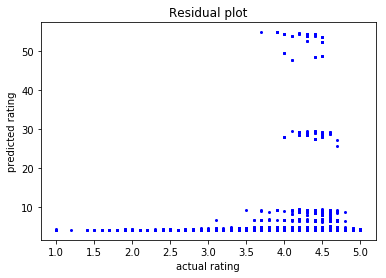

In [32]:
plt.scatter(XFreeAppsFeatures.Rating,lm.predict(XFreeAppsFeaturesTrain),c='b',s=4,alpha=1)

plt.title('Residual plot')
plt.ylabel('predicted rating')
plt.xlabel('actual rating')